# Tech Corp Data Analysis
In this project we will focus on the exploratory data analysis of stock prices. We will get the data using pandas datareader and will get the stock information for the followings  Amazon, Microsoft, Google and Apple from Jan 1st 2011 to Jan 1st 2021.

### The imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime as dt
%matplotlib inline

**Set the Datetime Parameters**

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

**Fetch the stock data for each of the tech. companies**

In [3]:
tickers = ['AAPL','GOOG','MSFT','AMZN']
for tick in tickers:
    globals()[tick] = data.DataReader(tick, 'yahoo', start, end) #Method 1

In [4]:
AAPL = data.DataReader('AAPL', 'yahoo', start, end)
GOOG = data.DataReader('GOOG', 'yahoo', start, end)
MSFT = data.DataReader('MSFT', 'yahoo', start, end)
AMZN = data.DataReader('AMZN', 'yahoo', start, end) #Method 2

**Concatenate the stock dataframes together into a single data frame called tech_stocks**

In [5]:
tech_stocks = pd.concat([AAPL,GOOG,MSFT,AMZN],keys=tickers,axis=1)

#### Set the Column Names

In [7]:
tech_stocks.columns.names=['Tech Com','Stock Price']
tech_stocks.head(2)

Tech Com         AAPL                                                    \
Stock Price      High    Low      Open     Close       Volume Adj Close   
Date                                                                      
2009-12-31   7.619643  7.520  7.611786  7.526071  352410800.0  6.462008   
2010-01-04   7.660714  7.585  7.622500  7.643214  493729600.0  6.562591   

Tech Com           GOOG                                      ...       MSFT  \
Stock Price        High         Low        Open       Close  ...       Open   
Date                                                         ...              
2009-12-31   311.532288  308.832428  311.208527  308.832428  ...  30.980000   
2010-01-04   313.579620  310.954468  312.304413  312.204773  ...  30.620001   

Tech Com                                             AMZN              \
Stock Price      Close      Volume  Adj Close        High         Low   
Date                                                                    
2009-12-31   30.480000  31929700.0  23.585039  137.279999  134.520004   
2010-01-04   30.950001  38409100.0  23.948717  136.610001  133.139999   

Tech Com                                                  
Stock Price        Open       Close   Volume   Adj Close  
Date                                                      
2009-12-31   137.089996  134.520004  4523000  134.520004  
2010-01-04   136.250000  133.899994  7599900  133.899994  

[2 rows x 24 columns]

#### What is the max close price for each tech stock throughout the time period ?

In [8]:
tech_stocks.xs(key='Close',axis=1,level='Stock Price').max()

Tech Com
AAPL     136.690002
GOOG    1827.989990
MSFT     231.649994
AMZN    3531.449951
dtype: float64

#### Create a new DataFrame to store the returns

In [19]:
returns = pd.DataFrame()

**Calculate the returns for each of the stocks and store them in the above created DataFrame**

In [20]:
for tick in tickers :
    returns[tick + " Returns"] = tech_stocks[tick]['Close'].pct_change()
returns.head()

,AAPL Returns,GOOG Returns,MSFT Returns,AMZN Returns
Date,,,,
2009-12-31,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.010920,0.015420,-0.004609
2010-01-05,0.001729,-0.004404,0.000323,0.005900
2010-01-06,-0.015906,-0.025209,-0.006137,-0.018116
2010-01-07,-0.001849,-0.023280,-0.010400,-0.017013


**Using returns DataFrame figure out the date when banks had there worst and best stocks**

In [23]:
returns.idxmax()

AAPL Returns   2020-03-13
GOOG Returns   2015-07-17
MSFT Returns   2020-03-13
AMZN Returns   2012-04-27
dtype: datetime64[ns]

In [24]:
returns.idxmin()

AAPL Returns   2020-03-16
GOOG Returns   2020-03-16
MSFT Returns   2020-03-16
AMZN Returns   2011-10-26
dtype: datetime64[ns]

**Look at the standard deviation of the returns**

In [25]:
returns.std()

AAPL Returns    0.017841
GOOG Returns    0.016388
MSFT Returns    0.016012
AMZN Returns    0.019990
dtype: float64

**Plot the closing trend for each of the tech stock**

<AxesSubplot:xlabel='Date'>

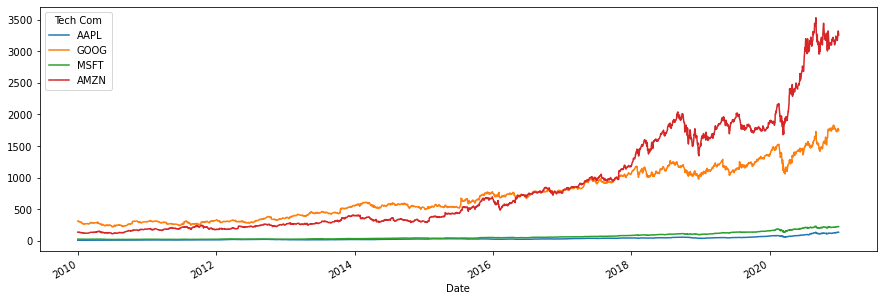

In [35]:
tech_stocks.xs(level='Stock Price',axis=1,key='Adj Close').plot(figsize=(15,5))

**Plot the rolling 30 day average against the Close Price for Amazon's stock for the year 2016**

<AxesSubplot:xlabel='Date'>

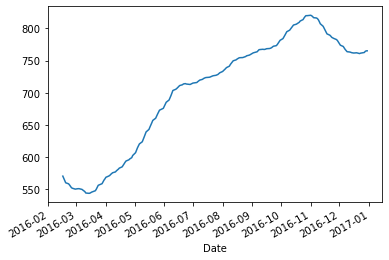

In [43]:
AMZN['Close']['2016-01-01':'2016-12-31'].rolling(window=30).mean().plot()

#### Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Tech Com', ylabel='Tech Com'>

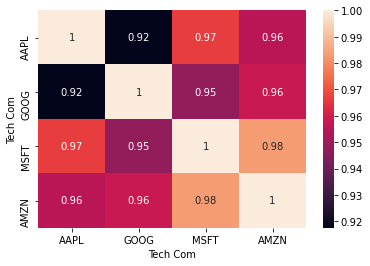

In [45]:
sns.heatmap(tech_stocks.xs(level='Stock Price',key='Close',axis=1).corr(),annot=True)

**Use seaborn's clustermap to cluster the correlations together:**

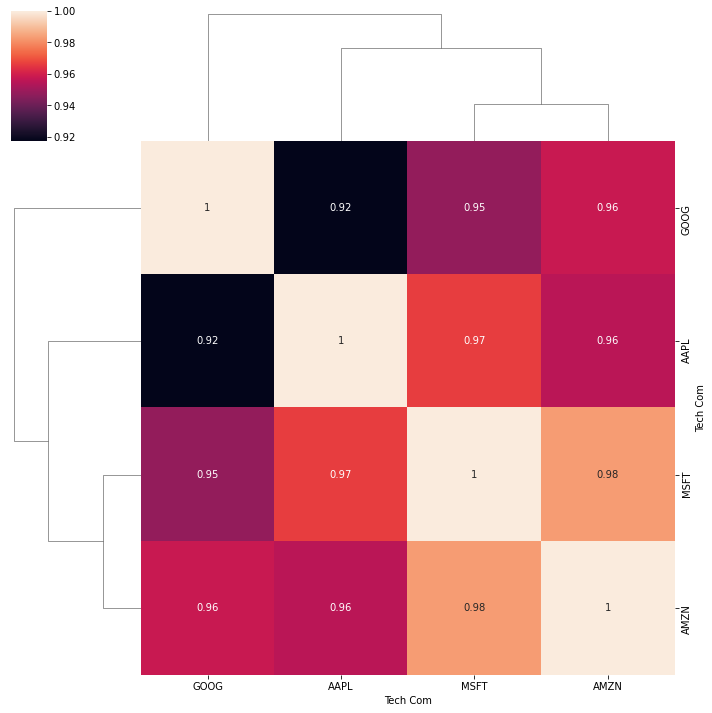

In [46]:
sns.clustermap(tech_stocks.xs(level='Stock Price',axis=1,key='Close').corr(),annot=True)

**Create a column daily return and plot a pct_change graph for Amazon in the year 2010**

<AxesSubplot:xlabel='Date'>

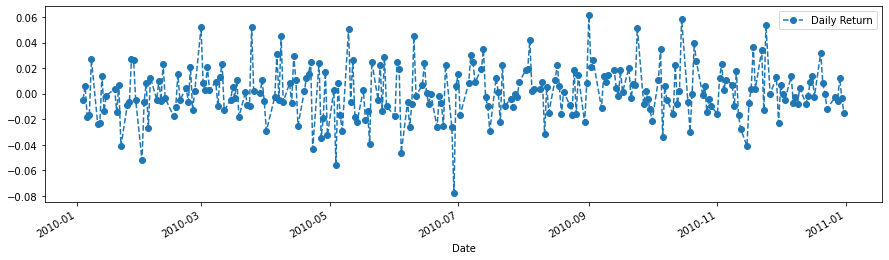

In [48]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].loc['2010-01-01':'2010-12-31'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')